# Assignment 11
### Hyperparameter Tuning

1. Load the diabetes dataset. Train a regression model and evaluate its performance.
2. Determine at least two different hyperparameters to tune.
3. Use a CV search class from sklearn to search for the best parameters for your model.
4. Output the results of the search, the best parameters found, and compare the performance of this model with your first model.

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
dir(load_diabetes())
diab = load_diabetes()

In [3]:
df = pd.DataFrame(diab.data,columns = diab.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
from sklearn.linear_model import ElasticNet  # Has 2 hyperparameters alpha and l1_ratio

In [5]:
#help(ElasticNet)
diab_model = ElasticNet(alpha=1,l1_ratio=.5)  # Use defaults of alpha=1 and l1_ratio =.5

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [7]:
X_train, X_test, y_train, y_test = train_test_split(diab.data, diab.target)
print(X_train.shape)
print(X_test.shape)

(331, 10)
(111, 10)


In [8]:
diab_model.fit(X_train,y_train)
preds = diab_model.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_test, preds))
print("RSquared: ", diab_model.score(X_test,y_test))

Mean Squared Error:  6522.51362762571
RSquared:  0.00827445559388229


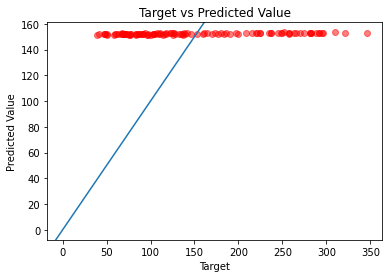

In [9]:
plt.scatter( y_test, preds, color = "red",alpha=.5)
plt.axline((0, 0), slope=1)
plt.title("Target vs Predicted Value")
plt.xlabel("Target")
plt.ylabel("Predicted Value")
plt.show()

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [11]:
distributions = {"alpha":uniform(0,1),"l1_ratio":uniform(0,1)}
diab_model_new = ElasticNet()
diab_model_new.fit(diab.data,diab.target)
model_tuner = RandomizedSearchCV(diab_model_new,distributions,n_iter=1000)
model_tuner.fit(diab.data,diab.target)

RandomizedSearchCV(estimator=ElasticNet(), n_iter=1000,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CADC288BB0>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CADC22BDF0>})

In [12]:
model_tuner.best_params_

{'alpha': 0.0035649932502919146, 'l1_ratio': 0.9364195468122573}

In [13]:
diab_model_tuned=ElasticNet(alpha= model_tuner.best_params_['alpha'], l1_ratio = model_tuner.best_params_['l1_ratio'])
diab_model_tuned.fit(X_train,y_train)
preds_tuned = diab_model_tuned.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, preds_tuned))
print("RSquared: ",diab_model_tuned.score(X_test,y_test))

Mean Squared Error:  2899.6905998798366
RSquared:  0.5591121149068524


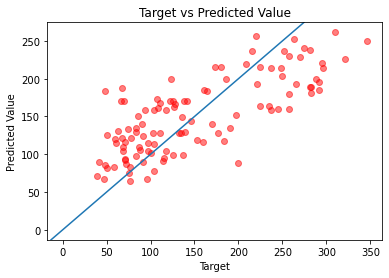

In [14]:
plt.scatter( y_test, preds_tuned, color = "red",alpha=.5)
plt.axline((0, 0), slope=1)
plt.title("Target vs Predicted Value")
plt.xlabel("Target")
plt.ylabel("Predicted Value")
plt.show()